# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [1]:
#Firstly, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [2]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
tf.__version__

'2.8.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [6]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [7]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

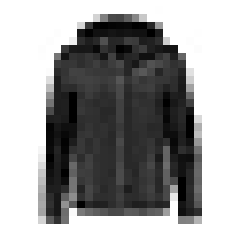

In [9]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [10]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [12]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [13]:
X_valid.shape

(5000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

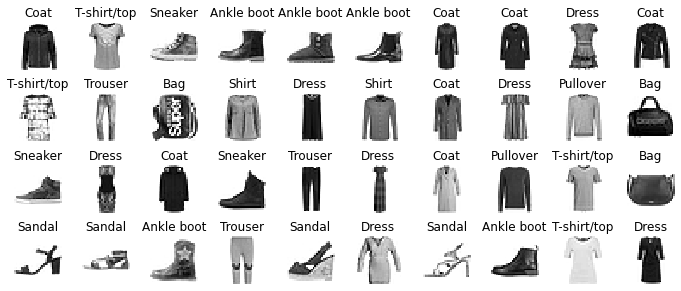

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [17]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [18]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [19]:
model.layers

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [22]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [23]:
model.get_layer(hidden1.name) is hidden1

True

In [24]:
weights, biases = hidden1.get_weights()

In [25]:
weights

array([[-0.07255511,  0.0507618 ,  0.03071549, ...,  0.04802767,
        -0.05636599,  0.0133121 ],
       [-0.04719896, -0.074391  , -0.04211502, ..., -0.03675021,
        -0.05195545, -0.06743024],
       [ 0.00759251, -0.03415599, -0.05999123, ...,  0.03989045,
         0.05392541,  0.01411936],
       ...,
       [-0.00995574, -0.06943855,  0.05617529, ..., -0.05884886,
        -0.02089528, -0.06708799],
       [ 0.02242902,  0.00773071,  0.02682208, ..., -0.03222459,
         0.01270018, -0.07069907],
       [-0.067333  , -0.04389411, -0.02783823, ..., -0.01432415,
        -0.07233525, -0.06626467]], dtype=float32)

In [26]:
weights.shape

(784, 300)

In [27]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [30]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7183 - accuracy: 0.7627 - val_loss: 0.5441 - val_accuracy: 0.8078
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4830 - accuracy: 0.8318 - val_loss: 0.4598 - val_accuracy: 0.8428
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4389 - accuracy: 0.8463 - val_loss: 0.4062 - val_accuracy: 0.8622
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4143 - accuracy: 0.8561 - val_loss: 0.3911 - val_accuracy: 0.8676
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3941 - accuracy: 0.8613 - val_loss: 0.4067 - val_accuracy: 0.8618
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3759 - accuracy: 0.8658 - val_loss: 0.3770 - val_accuracy: 0.8666
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3633 - accuracy: 0.8721 - val_loss: 0.3659 - val_accuracy:

In [31]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [32]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

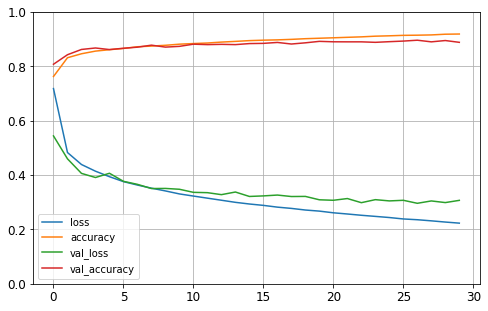

In [34]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3461 - accuracy: 0.8791


[0.346142441034317, 0.8791000247001648]

In [36]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.92],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [37]:
y_pred = model.predict_classes(X_new)
y_pred

AttributeError: ignored

In [ ]:
np.array(class_names)[y_pred]

In [39]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

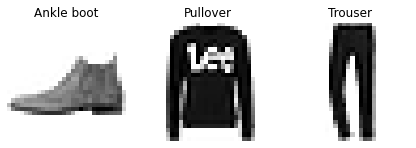

In [38]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 5) Use Batch Normalisation
#### 6) repeat with more layers
#### 7) apply on different datasets

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3685 - accuracy: 0.8644 - val_loss: 0.3799 - val_accuracy: 0.8630
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3325 - accuracy: 0.8771 - val_loss: 0.3223 - val_accuracy: 0.8834
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3043 - accuracy: 0.8870 - val_loss: 0.3382 - val_accuracy: 0.8796
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2852 - accuracy: 0.8939 - val_loss: 0.2966 - val_accuracy: 0.8904
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2742 - accuracy: 0.8977 - val_loss: 0.3056 - val_accuracy: 0.8848
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2605 - accuracy: 0.9022 - val_loss: 0.3145 - val_accuracy: 0.8956
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2498 - accuracy: 0.9061 - val_loss: 0.3071 - val_accuracy:

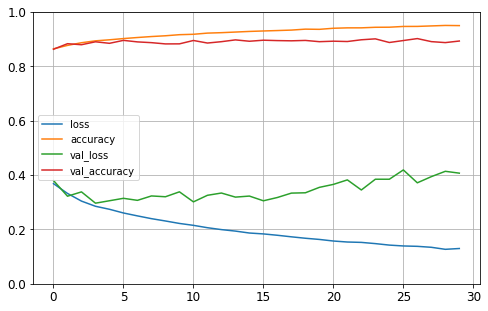

In [40]:
#1
#Let's use Adam optimizer.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))


pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


We can see that Adam offers a better result on the training set with a loss fuction decreasing rapidly,but a much worse performance on the validation set wit an increasing val_loss. That's an overtraining issue.

Epoch 1/30
5500/5500 [==============================] - 13s 2ms/step - loss: 0.0856 - accuracy: 0.9669 - val_loss: 0.4052 - val_accuracy: 0.9014
Epoch 2/30
5500/5500 [==============================] - 14s 2ms/step - loss: 0.0774 - accuracy: 0.9696 - val_loss: 0.4328 - val_accuracy: 0.9004
Epoch 3/30
5500/5500 [==============================] - 14s 2ms/step - loss: 0.0743 - accuracy: 0.9712 - val_loss: 0.4368 - val_accuracy: 0.9000
Epoch 4/30
5500/5500 [==============================] - 13s 2ms/step - loss: 0.0720 - accuracy: 0.9722 - val_loss: 0.4317 - val_accuracy: 0.9032
Epoch 5/30
5500/5500 [==============================] - 13s 2ms/step - loss: 0.0699 - accuracy: 0.9724 - val_loss: 0.4366 - val_accuracy: 0.9004
Epoch 6/30
5500/5500 [==============================] - 13s 2ms/step - loss: 0.0681 - accuracy: 0.9732 - val_loss: 0.4524 - val_accuracy: 0.9018
Epoch 7/30
5500/5500 [==============================] - 13s 2ms/step - loss: 0.0660 - accuracy: 0.9748 - val_loss: 0.4587 - val_ac

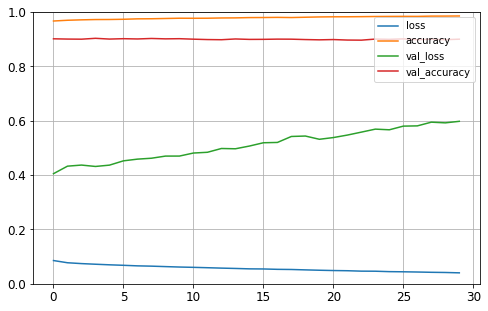

In [41]:
#2
#Let's use batch_size =10.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=10, epochs=30,
                    validation_data=(X_valid, y_valid))


pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


We can see that the smaller batch size causes overtraining.

Epoch 1/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0337 - accuracy: 0.9892 - val_loss: 0.6071 - val_accuracy: 0.8992
Epoch 2/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0328 - accuracy: 0.9893 - val_loss: 0.6069 - val_accuracy: 0.9008
Epoch 3/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0325 - accuracy: 0.9895 - val_loss: 0.6121 - val_accuracy: 0.8996
Epoch 4/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0321 - accuracy: 0.9898 - val_loss: 0.6175 - val_accuracy: 0.8984
Epoch 5/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.6145 - val_accuracy: 0.9014
Epoch 6/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0315 - accuracy: 0.9901 - val_loss: 0.6160 - val_accuracy: 0.9000
Epoch 7/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.6254 - val_accuracy:

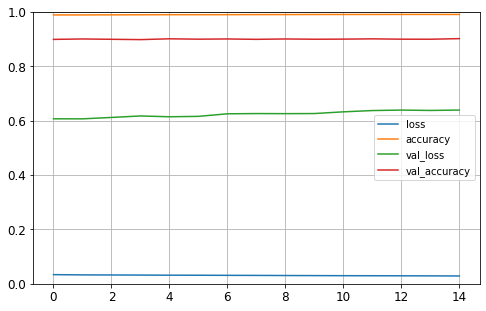

In [42]:
#3
#epochs=15
history = model.fit(X_train, y_train, batch_size=32, epochs=15,
                    validation_data=(X_valid, y_valid))


pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

We can notice that the model does'nt train at all.

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7554 - accuracy: 0.7382 - val_loss: 0.4879 - val_accuracy: 0.8324
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4760 - accuracy: 0.8308 - val_loss: 0.4188 - val_accuracy: 0.8596
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4229 - accuracy: 0.8485 - val_loss: 0.3937 - val_accuracy: 0.8646
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3932 - accuracy: 0.8591 - val_loss: 0.3848 - val_accuracy: 0.8608
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3692 - accuracy: 0.8679 - val_loss: 0.3729 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3526 - accuracy: 0.8722 - val_loss: 0.3502 - val_accuracy: 0.8752
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3363 - accuracy: 0.8781 - val_loss: 0.3488 - val_accuracy:

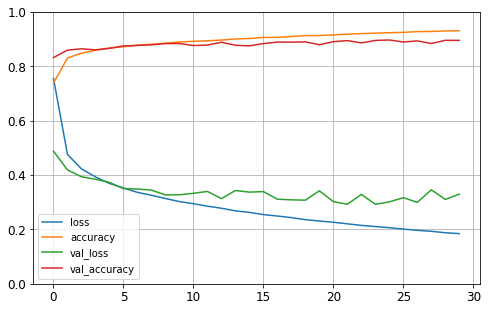

In [43]:
#Let's create a new model with more layers.
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history2 = model2.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))


pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


Adding more layers caused overtraining.

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9217 - accuracy: 0.6760 - val_loss: 0.5182 - val_accuracy: 0.8166
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5588 - accuracy: 0.8021 - val_loss: 0.4954 - val_accuracy: 0.8182
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4887 - accuracy: 0.8281 - val_loss: 0.4394 - val_accuracy: 0.8352
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4483 - accuracy: 0.8412 - val_loss: 0.3758 - val_accuracy: 0.8674
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4247 - accuracy: 0.8499 - val_loss: 0.3739 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4025 - accuracy: 0.8574 - val_loss: 0.3725 - val_accuracy: 0.8668
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3857 - accuracy: 0.8624 - val_loss: 0.3570 - val_accuracy:

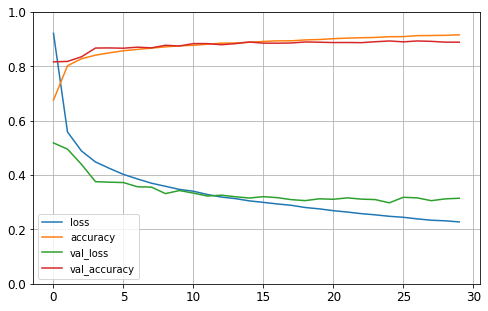

In [45]:
#Let's add a dropout layer.
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history2 = model2.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))


pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()



Adding a dropout layer has improved the model.

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7125 - accuracy: 0.7591 - val_loss: 0.4285 - val_accuracy: 0.8532
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4806 - accuracy: 0.8303 - val_loss: 0.4674 - val_accuracy: 0.8378
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4333 - accuracy: 0.8470 - val_loss: 0.3947 - val_accuracy: 0.8582
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4060 - accuracy: 0.8565 - val_loss: 0.3656 - val_accuracy: 0.8656
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3803 - accuracy: 0.8648 - val_loss: 0.3541 - val_accuracy: 0.8742
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3619 - accuracy: 0.8698 - val_loss: 0.3626 - val_accuracy: 0.8702
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3517 - accuracy: 0.8732 - val_loss: 0.3532 - val_accuracy:

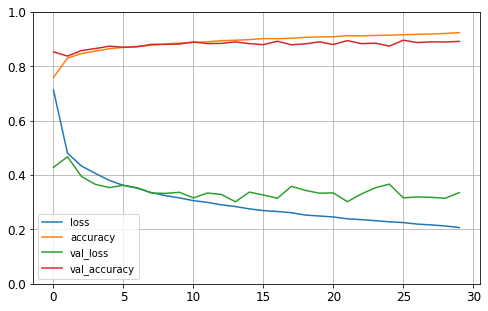

In [47]:
#5
#Let's use batch normalisation.
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(axis=1),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history2 = model2.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))


pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()



Adding a BatchNormalization layer has caused overtraining.

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6984 - accuracy: 0.7624 - val_loss: 0.4163 - val_accuracy: 0.8486
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4826 - accuracy: 0.8306 - val_loss: 0.3921 - val_accuracy: 0.8562
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4331 - accuracy: 0.8464 - val_loss: 0.3405 - val_accuracy: 0.8780
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4013 - accuracy: 0.8573 - val_loss: 0.3421 - val_accuracy: 0.8744
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3845 - accuracy: 0.8626 - val_loss: 0.3349 - val_accuracy: 0.8806
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3646 - accuracy: 0.8679 - val_loss: 0.3269 - val_accuracy: 0.8798
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3477 - accuracy: 0.8752 - val_loss: 0.3257 - val_accuracy:

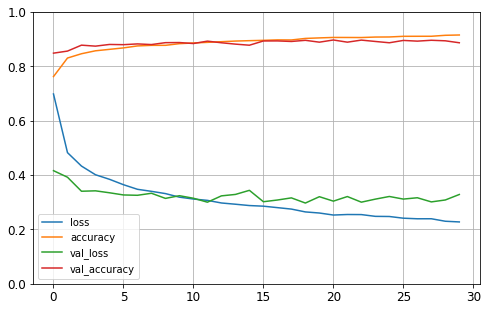

In [48]:
#6
#Let's add another batchNormalisation layer.
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(axis=1),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(axis=1),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history2 = model2.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))


pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


Adding an additional BatchNormalization layer has suprisingly improved the model.